#  Análise da Técnica de Inferência do Teste A/B

Grupo: Bruna Kimura, Felipe Scandiuzzi, Gabriel Vilaça, Vitória Mattos

### Técnica de Inferência escolhida:



Escolhemos disponibilizar 4 imagens de cartas diferentes e o usuário deve escolher uma carta determinada pela página dentre elas.
O tempo de reação para selecionar a carta instruída será analisado e comparado num teste A/B, e posteriormente será feito uma distribuição dos dados da amostra estudada.


### Justificativa:

Análise será feita para determinar qual é a direção de escolha preferida dos usuários pelo teste A/B. 
Os usuários irão utilizar as duas versões do site que serão escolhidas de forma randômica e selecionar a carta instruída.
Assim, para chegar na carta designada, os usuários poderam fazer o movimento da esquerda para a direita ou vice-versa, e o tempo
de reação dependerá da direção do caminho escolhido com o mouse. 

### Parte 1: Simulação teórica

In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import itertools
from scipy import stats
os.getcwd()

'C:\\Users\\Bruna\\Documents\\GitHub\\CD\\Projeto_2'

Valores aleatórios para o tempo das versões A e B.

In [3]:
Dados = pd.DataFrame()
Valores_Tempo_A = [2.004, 1.568, 1.874, 2.301, 3.2677, 2.8686]
Valores_Tempo_B = [1.4465, 1.8643, 3.376, 4.3686, 3.8273, 2.977]
Dados["Values_A"] = Valores_Tempo_A
Dados["Values_B"] = Valores_Tempo_B

In [56]:
x_a = Dados.Values_A.mean()
x_b = Dados.Values_B.mean()

s_a = (Dados.Values_A.var())**(1/2)
s_b = (Dados.Values_B.var())**(1/2)

print("O valor de mA é: {0:.2f}".format(x_a))
print("O valor de mB é: {0:.2f}".format(x_b))
print("O valor de sA é: {0:.2f}".format(s_a))
print("O valor de sB é: {0:.2f}".format(s_b))



O valor de mA é: 2.31
O valor de mB é: 2.98
O valor de sA é: 0.64
O valor de sB é: 1.13


#### Assumindo que as variâncias são desconhecidas e diferentes

#### H0: mA = mB => Hipótese Nula

#### H1: mA != mB => Hipótese Alternativa 

#### Nível de significância: 1%

In [5]:
D = mi_a - mi_b
n_a = 6
n_b = 6
T = (D - 0)/((((desv_a**2)/n_a) + ((desv_a**2)/n_b))**(1/2))
print("O T observado é: {0}".format(T)) 

O T observado é: -1.78682154205908


In [6]:
A = ((((desv_a)**2)/n_a) + (((desv_b)**2)/n_b))**2

B = ((((desv_a)**2)/n_a)**2)/(n_a - 1)

C = ((((desv_b)**2)/n_b)**2)/(n_b - 1)

V2=A/(B+C)

v = (((((desv_a)**2)/n_a) + (((desv_b)**2)/n_b))**2)/(((((desv_a**2)/n_a)**2)/(n_a - 1)) + ((((desv_b**2)/n_b)**2)/(n_b - 1)))
print("O grau de liberdade é: {0}".format(v))

O grau de liberdade é: 7.920878126219283


Assumindo que nosso nível de significância é de 1%, temos que o "t" é de 2,896. Portanto, o "t observado" está fora da região crítica. Desta forma, não rejeitamos a hipótese nula, e pode-se inferir que as médias dos tempos A e B são iguais com 99% de confiança.

### Parte 2: Simulação Prática

In [8]:
arquivo = open("dados.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

In [9]:
lista_dicionarios = []

for k,v in dados_fire["logs"].items():
    lista_dicionarios.append(v)

In [10]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)

In [11]:
agrupado = dataframe.groupby(by=["user_id", "versao"])

In [12]:
users = set(dataframe.user_id) 

In [13]:
users = list(users)

In [14]:
resultados = []

for u in users:
    for versao in ["A", "B"]:
        if (u, versao) in agrupado.groups.keys(): # Check if a specific pair user/type of test happened
            grupo1 =  agrupado.get_group((u, versao))
            grupo1 = grupo1.sort_values(by="tempo") # Para evitar que inícios sem fim gerem tempos negativos
            
            if len(grupo1[grupo1.tipo=="final"])>= 1 and len(grupo1[grupo1.tipo=="inicial"]) >= 1:
                delta_t = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicial"].iloc[0].tempo
                resultados.append({"user_id":u, "delta_t":delta_t, "versao":versao})

Exemplo: Os valores de tempo final e inicial retornados pelo firebase.

In [15]:
grupo1.sort_values(by="tempo")

,tempo,tipo,user_id,versao
30,1478430469295,inicial,971035642,A
59,1478430475613,final,971035642,A


In [16]:
dataframe_resumo = pd.DataFrame.from_records(resultados)

Convertendo o tempo de milissegundos para segundos.

In [17]:
dataframe_resumo.delta_t/=1000

Dataframe que possui apenas os valores de tempo do teste AB e a versão utilizada na verificação.

In [18]:
dataframe_resumo

,delta_t,user_id,versao
0,39.316,1036081152,B
1,14249.000,241862913,A
2,15.894,1355150594,A
3,11310.869,1355150594,B
4,14.849,285365760,B
5,4.893,1561760900,A
6,13.579,3559310601,B
7,7.851,4187339032,A
8,22.837,2734949529,A
9,12.989,2949118617,A


Ilustração dos histogramas que possuem os valores do tempo para a versão A e para a versão B.

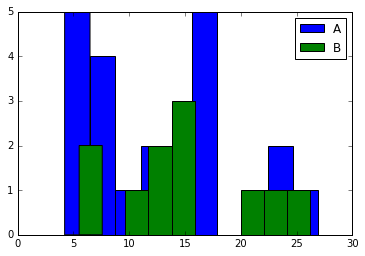

In [20]:
tempos_A = list(dataframe_resumo[dataframe_resumo.versao=="A"].delta_t)
tempos_B = list(dataframe_resumo[dataframe_resumo.versao=="B"].delta_t)
tempo_A_novo = []
tempo_B_novo = []
t = 30
for tempo in tempos_A:
    if tempo < t:
        tempo_A_novo.append(tempo)
for tempo in tempos_B:
    if tempo < t:
        tempo_B_novo.append(tempo)        
plt.hist(tempo_A_novo, bins=10)
plt.hist(tempo_B_novo, bins=10)
plt.legend(["A","B"])

## Teste de comparação de duas médias com variâncias desconhecidas

### Variâncias desconhecidas e diferentes 

In [57]:
dataframe_resumo["Time_Cut_A"] = dataframe_resumo[dataframe_resumo.versao=="A"].delta_t > 30
dataframe_resumo["Time_Cut_B"] = dataframe_resumo[dataframe_resumo.versao=="B"].delta_t > 30


x_a = dataframe_resumo.Time_Cut_A.mean()
x_b = dataframe_resumo.Time_Cut_B.mean()

s_a = (dataframe_resumo.Time_Cut_A.var())**(1/2)
s_b = (dataframe_resumo.Time_Cut_B.var())**(1/2)

print("O valor de mA é: {0:.2f}".format(x_a))
print("O valor de mB é: {0:.2f}".format(x_b))
print("O valor de sA é: {0:.2f}".format(s_a))
print("O valor de sB é: {0:.2f}".format(s_b))


O valor de mA é: 0.16
O valor de mB é: 0.35
O valor de sA é: 0.37
O valor de sB é: 0.49


#### H0: mA = mB => Hipótese Nula

#### H1: mA != mB => Hipótese Alternativa 

#### Nível de significância: 1%

In [49]:
D = x_a - x_b
n_a = len(dataframe_resumo["Time_Cut_A"])
n_b = len(dataframe_resumo["Time_Cut_B"])
T = (D - 0)/((((desv_a**2)/n_a) + ((desv_a**2)/n_b))**(1/2))
print("O T observado é: {0:.2f}".format(T)) 

O T observado é: -2.36


In [50]:
A = ((((desv_a)**2)/n_a) + (((desv_b)**2)/n_b))**2

B = ((((desv_a)**2)/n_a)**2)/(n_a - 1)

C = ((((desv_b)**2)/n_b)**2)/(n_b - 1)

V2=A/(B+C)

v = (((((desv_a)**2)/n_a) + (((desv_b)**2)/n_b))**2)/(((((desv_a**2)/n_a)**2)/(n_a - 1)) + ((((desv_b**2)/n_b)**2)/(n_b - 1)))
print("O grau de liberdade é: {0:.2f}".format(v))

O grau de liberdade é: 76.50


### Conclusão

Os dados possuem um grau de liberdade de aproximadamente 76, e o nível de significância em 1%. A partir da tabela da distribuição de t-student, tem-se que o ponto crítico se situa em -2.375.

Assim, como a região crítica se situa em -2.375 e o T observado se situa em -2.36, o T está fora da região crítica, e desta forma, o H0 não é rejeitado. 

A partir dos resultados, pode-se concluir que o H0 está correto com 99% de confiança, e que os valores das médias dos tempos da versão A e da versão B são iguais.

Também é possível inferir que, a partir do estudo das versões A e B, é possível concluir que não há uma diferença significativa no delta tempo das versões, o que demonstra que não importa o posicionamento dos botões, pois o tempo médio decorrido nas duas versões são muito próximas.